# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [2]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [3]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)


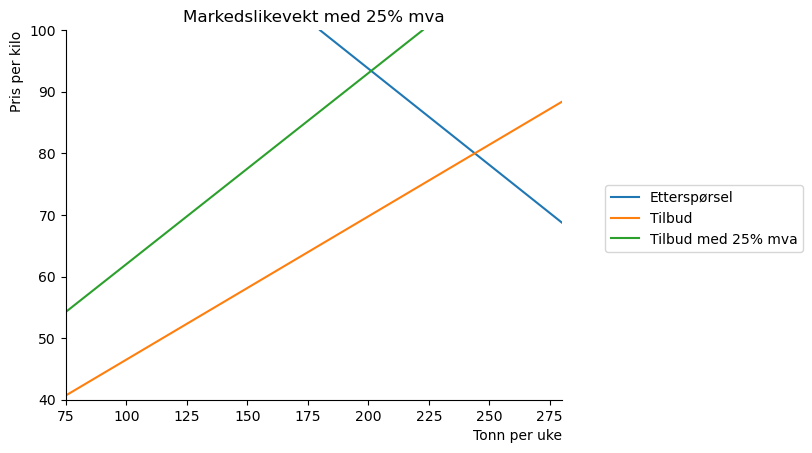

In [4]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

# tilbud med 25% mva

ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva')

ax.set_title('Markedslikevekt med 25% mva')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Forklar hvorfor tilbudsfunksjonen med mva har brattere helning enn den med t=0.
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse is figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


### Løsning

1. Desto høyere prisen blir jo mer utgjør 25% mva i NOK (og det er NOK som er enheten på den verikale aksen). Er salgsprisen 10kr får selger 7.5kr (avstand mellom tilbudskurvene er 2.5kr); er salgsprisen 20kr får selger 15kr og avstanden mellom kurvene er 5kr.

In [5]:
# 2 og 3
# definer symboler i sympy

x,p,t = sp.symbols('x p t', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(x_d(p),x_s(p,t))
eq_cond

Eq(500 - 3.2*p, 4.3*p*(1 - t) - 100)

In [6]:
# løs for p
p_k_eq=sp.solve(eq_cond,p)[0]
p_k_eq

-6000.0/(43.0*t - 75.0)

In [7]:
# finn tilsvarende kvantum
x_eq=x_s(p_k_eq,t)
x_eq

-25800.0*(1 - t)/(43.0*t - 75.0) - 100

In [8]:
# selger får
p_s_eq=p_k_eq*.75
p_s_eq

-4500.0/(43.0*t - 75.0)

In [9]:
# Inntekt til staten

prov=(p_k_eq-p_s_eq)*x_eq
prov

-1500.0*(-25800.0*(1 - t)/(43.0*t - 75.0) - 100)/(43.0*t - 75.0)

In [10]:
# Vi vet fra forelesningen at p=80 med t=0

# kjøper andel
k_andel=(p_k_eq-80)*x_eq/prov
k_andel

-0.000666666666666667*(-80 - 6000.0/(43.0*t - 75.0))*(43.0*t - 75.0)

In [11]:
kons_andel_mva = float(k_andel.subs(t,.25))
kons_andel_mva


0.573333333333333

Kjøpere betaler $57\frac{1}{3}\%$ av skatten.      

La oss nå beregne likevektsverdiene:

In [12]:
p_s_mva = float(p_s_eq.subs(t, 0.25))
p_k_mva = float(p_k_eq.subs(t, 0.25))
p_0 = float(p_k_eq.subs(t, 0))
x_0 = float(x_eq.subs(t, 0))
x_mva = float(x_eq.subs(t, 0.25))
prov_mva = float(prov.subs(t, 0.25))


In [13]:
print (f""" 
Uten mva er prisen {p_0}kr og omsatt kvantum {x_0} enheter
Med mva betaler konsumenter {np.round(p_k_mva,2)}kr
Selgers pris er {np.round(p_s_mva,2)}kr
Omsatt kvantum med mva er {np.round(x_mva,2)} enheter
Avgiftproveny er {np.round(prov_mva, 2)}kr
""")

 
Uten mva er prisen 80.0kr og omsatt kvantum 244.0 enheter
Med mva betaler konsumenter 93.39kr
Selgers pris er 70.04kr
Omsatt kvantum med mva er 201.17 enheter
Avgiftproveny er 4696.51kr



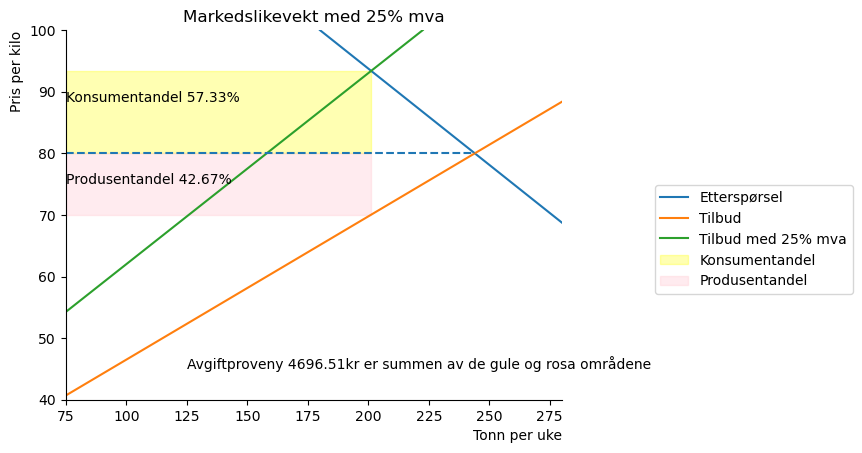

In [14]:
# vi kan illustrere hvem som betaler hva av avgiften

lav_x = 75

q=np.linspace (lav_x, x_mva, 100)


ax.hlines(p_0,75,x_0, linestyles='dashed')

ax.fill_between(q,p_k_mva,p_0, color = "yellow",alpha = 0.3,label='Konsumentandel')
ax.fill_between(q,p_0,p_s_mva, color = "pink",alpha = 0.3,label='Produsentandel')

ax.text(lav_x, p_k_mva-5, f"Konsumentandel {np.round(100*kons_andel_mva,2)}%")
ax.text(lav_x, p_s_mva+5, f"Produsentandel {np.round(100-100*kons_andel_mva,2)}%")

ax.text(125, 45, f"Avgiftproveny {np.round(prov_mva,2)}kr er summen av de gule og rosa områdene")

ax.legend(bbox_to_anchor=(1.6,0.6))
fig


4. Vi diskuterte dette i forelesningen.        
Noen momenter (blant mange):       
- For å ilegge en stykkavgift må man definere hva "én enhet" er, mens mva går på verdi som er muligens enkelere å definere. På den andre siden beregnes mva på merverdien skapt i verdikjeden, og dette kan være komplisert å beregne.
- Mva kan være mindre forutsigbart for de som samler inn provenyet ettersom verdi er avhengig av både pris og kvantum, mens det å beregne provenyet fra en stykkprisavgift krever info kun om forventet omsetning.
- Man betaler mer i kroner jo høyere forbruket er med mva, og da kan det brukes til å oppmuntre konsumenter til å spare.
- Inflasjon gjør at priser økes, og en mva tar hensyn til dette slik at den reelle verdien av provenyet er uendret. Dette skjer ikke automatisk med en stykkprisavgift (med mindre den er indeksregulert, og øker i takt med endringer i KPI). Stykkprisavgifter endres i Nasjonalbudsjettet.